<a href="https://colab.research.google.com/github/Jaise152/google_map_A_star_algo/blob/main/Google_map_Astar_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Things to Follow</h3>

1. Use appropriate data structures for the fringes and explain the reasoning behind the usage. You need not create data structures, instead use available libraries directly.

2. Avoid any hard-coding unless absolutely necessary.

3. Provide proper documentation

4. Read the question file provided carefully and attempt all the questions! 

Coding begins now!!!

1) Define the environment representation in the following code block

In [ ]:
# Performance: path taken from panji to chennai is ['Panji', 'Bellari', 'Tirupati', 'Chennai']
# Environment: Geographical information regarding the cities and corresponding distance to the neighbouring cities
# Actuators: graph implementation using adjacency matrix.
# Sensors: information regrading the current state and goal state.


Define the haversine formula and what it does

In [ ]:
import collections
import math
import numpy as np
import networkx as nx
from queue import PriorityQueue

2) Define a function which calculates the heuristic distance from each city to the destination city in the following code block

In [ ]:
Cordinates = {
    'Panji':[15.4909,73.8278],
    'Raichur':[16.2076,77.3463],
    'Mangalore':[12.9141,74.8560],
    'Bellari':[15.1394,76.9214],
    'Tirupati':[13.6288, 79.4192],
    'Kurnool':[15.8281,78.0373],
    'Kozhikode':[ 11.2588,75.7804],
    'Bangalore':[ 12.9716,77.5946],
    'Nellore':[ 14.4426,79.9865],
    'Chennai':[13.0827,80.2707]
    }

In [ ]:
class Hurestic:
    def __init__(self,start,goal):
        self.start = start
        self.goal = goal


#Function to get cordinates of a city
    def cord(city):
        lat1, long1 = (Cordinates[city][0], Cordinates[city][1])
        return lat1,long1

#Function to calculate the hurestic
    def distance(origin, destination):
        lat1, lon1 = Hurestic.cord(origin)
        lat2, lon2 = Hurestic.cord(destination)
        radius = 6371 # km

        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c

        return d
    def huresticvalue(start,goal):
        H={}
        for i in Cities:
            H[i] = Hurestic.distance(i,goal)
        return H
# The given cities
Cities = Cordinates.keys()

3) Implementation of A* Algorithm . Feel free to add code blocks for each methods needed starting here.
Please modularize the implementation of A* and write each of them in a code block. 

In [ ]:
#Creating graph for the given road network
class Vertex:
    def __init__(self, n):
        self.name = n
class Graph:
    vertices = {}
    edges = []
    edge_indices = {}
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            for row in self.edges:
                row.append(0)
            self.edges.append([0] * (len(self.edges)+1))
            self.edge_indices[vertex.name] = len(self.edge_indices)
            return True
        else:
            return False
    def add_edge(self, u, v, weight):
        if u in self.vertices and v in self.vertices:
            self.edges[self.edge_indices[u]][self.edge_indices[v]] = weight
            self.edges[self.edge_indices[v]][self.edge_indices[u]] = weight
            return True
        else:
            return False
    def print_graph(self):
        for v, i in sorted(self.edge_indices.items()):
            print(v + ' ', end='')
            for j in range(len(self.edges)):
                print(self.edges[i][j], end='')
            print(' ')
            
    def neighbour(self,edge):
        b = []
        for i in Cities:
            if self.edges[self.edge_indices[i]][self.edge_indices[edge]] > 0:
                b.append(i)
        return b
    
    def cost(self,u,v):
        x = self.edges[self.edge_indices[u]][self.edge_indices[v]]
        return x

In [ ]:
g = Graph()

In [ ]:
for i in Cities:
    g.add_vertex(Vertex(i))

In [ ]:
g.add_edge('Panji','Raichur',457)
g.add_edge('Panji','Mangalore',365)
g.add_edge('Panji','Bellari',409)
g.add_edge('Raichur','Kurnool',100)
g.add_edge('Raichur','Tirupati',453)
g.add_edge('Mangalore','Bangalore',352)
g.add_edge('Mangalore','Kozhikode',233)
g.add_edge('Bellari','Tirupati',379)
g.add_edge('Bellari','Bangalore',311)
g.add_edge('Kurnool','Tirupati',340)
g.add_edge('Kurnool','Nellore',325)
g.add_edge('Tirupati','Nellore',136)
g.add_edge('Tirupati','Chennai',153)
g.add_edge('Bangalore','Kozhikode',356)
g.add_edge('Bangalore','Chennai',346)
g.add_edge('Nellore','Chennai',175)

True

In [ ]:
def mincost (dist):
    res =  [key for key in dist if 
        all(dist[temp] >= dist[key] 
        for temp in dist)] 
    
    return res[0]

In [ ]:
def a_star_search(Graph, start, goal):
    frontier = {start:0}
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    path = []
    count = 0
    H = Hurestic.huresticvalue(start,goal)
    #print(H)
    #print("start = "+ start)
    while len(frontier)>0:
        count = count +1
        #print("Initial frontier = ", frontier)
        current = mincost(frontier)
        path.append(current)
        #print("min from frontier = "+ current)
        if current == goal:
            break
        
        #print("Neighbour ofcurrent frontier = " , Graph.neighbour(current))
        for next in Graph.neighbour(current):
            new_cost = cost_so_far[current] + Graph.cost(current, next)
            #print("Cost of neighbour  ",next,"=" , new_cost)
            #print(type(new_cost))
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                #print(type(cost_so_far[next]))
                #print("Huristic = ", H[next])
                #print(type(H[next]))
            priority = new_cost + H[next]
            #print("Value of f = ", priority)
            frontier[next] = priority
            came_from[next] = current
        frontier.pop(current)
    return print("(3.1) Path taken is :",path),print("(3.2) Cost of the path : ",cost_so_far[goal]),print("(3.3) Number of nodes visited to reach this state is :", count)

Call your main function/algorithm block in the next code block with appropriate input representation

In [ ]:
g.print_graph()

Bangalore 003523110035600346 
Bellari 4090003790031100 
Chennai 0000153003461750 
Kozhikode 00233000035600 
Kurnool 0100003400003250 
Mangalore 3650000023335200 
Nellore 0000136325000175 
Panji 0457365409000000 
Raichur 4570004531000000 
Tirupati 04530379034000136153 


In [ ]:
g.edges

[[0, 457, 365, 409, 0, 0, 0, 0, 0, 0],
 [457, 0, 0, 0, 453, 100, 0, 0, 0, 0],
 [365, 0, 0, 0, 0, 0, 233, 352, 0, 0],
 [409, 0, 0, 0, 379, 0, 0, 311, 0, 0],
 [0, 453, 0, 379, 0, 340, 0, 0, 136, 153],
 [0, 100, 0, 0, 340, 0, 0, 0, 325, 0],
 [0, 0, 233, 0, 0, 0, 0, 356, 0, 0],
 [0, 0, 352, 311, 0, 0, 356, 0, 0, 346],
 [0, 0, 0, 0, 136, 325, 0, 0, 0, 175],
 [0, 0, 0, 0, 153, 0, 0, 346, 175, 0]]

In [ ]:
g.edge_indices

{'Panji': 0,
 'Raichur': 1,
 'Mangalore': 2,
 'Bellari': 3,
 'Tirupati': 4,
 'Kurnool': 5,
 'Kozhikode': 6,
 'Bangalore': 7,
 'Nellore': 8,
 'Chennai': 9}

In [ ]:
inv_edge = {v: k for k, v in g.edge_indices.items()}

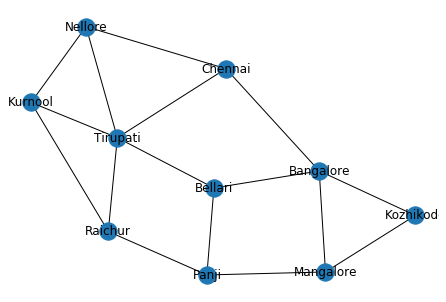

In [ ]:
G = nx.from_numpy_matrix(np.array(g.edges)) 
nx.draw(G,labels=inv_edge, with_labels=True)

The agent should provide expected output for questions mentioned below in the subsequent blocks

(3.1) Path taken to reach destination from Panaji

(3.2) Cost of the path

(3.3) Total Number of nodes vistied to get this state

In [ ]:
#Computation call
start = 'Panji'
goal = 'Chennai'
a_star_search(g,start,goal)

(3.1) Path taken is : ['Panji', 'Bellari', 'Tirupati', 'Chennai']
(3.2) Cost of the path :  941
(3.3) Number of nodes visited to reach this state is : 4


(None, None, None)

<center>All the best!! Happy Coding!!Let human intelligence prevail</center>
<center>**********************************************************</center>